# COMM7370 AI Theories and Applications
# Search Algorithms

## Informed Search
Implementation of the basic informed search algorithms using `NetworkX`library

In [1]:
# Install NetworkX, Matplotlib, Pandas, Numpy using pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy

## Using our algorithm

## Travelling in Romania
Import the adjacency matrix from CSV file. Includes the distances between the cities directly connected in the map.

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

dfRomania = pd.read_csv('../data/' + 'romania.csv')

Change NA to 0, needed for NetworkX graph.

In [4]:
dfRomania.fillna(0, inplace=True)
dfRomania.set_index('city', inplace = True)

Convert Pandas DataFrame to NetworkX Graph

In [5]:
romaniaMap = nx.from_pandas_adjacency(dfRomania, nx.Graph)

Display the roadmap

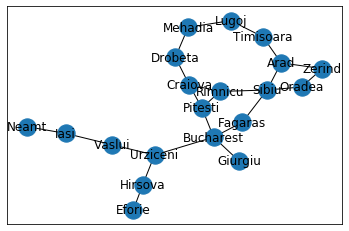

In [6]:
layout=nx.spring_layout(romaniaMap)
nx.draw_networkx(romaniaMap, layout, with_labels=True)

### Heuristic function
Specific for our problem. Straight line distance from the actual city to Bucharest.

In [7]:
def evalHeuristic(graph, node):
    dfDist = pd.read_csv('../data/' + 'romaniaDist.csv')
    dfDist.set_index('city', inplace=True)
    return dfDist.at[node,'dist']

## A* Search

In [10]:
def fringeAddNode(fringeTemp, nodeName, heuristic):
    
    # Create a tuple (node name, heuristic value) and add it to the fringe
    node = (nodeName, heuristic)
    fringeTemp.append(node)
    
    return fringeTemp

def fringeExtractBest(fringeTemp):
    
    # Order the fringe by decreasing heustic value (tup[1])
    # Why Here?
    fringe = fringeTemp.sort(key = lambda tup: tup[1], reverse = True)

    # For debugging
    print('Ordered Fringe:', fringeTemp)
    
    # Extract the node with best heuristic value (on list tail)
    bestNode = fringeTemp.pop()
    nodeName = bestNode[0]
    nodeCost = bestNode[1]
    
    # Return the updated fringe, the extracted node name
    return fringeTemp, nodeName, nodeCost

def aStar(graph, startNode, endNode, maxSteps):
    # Initialisation
    # Use visited flag on each node to find if we should consider it for fringe expansion
    fringe = []
    currentNode = None
    step = 0
    costSoFar = 0
    
    # Update navigation startup values, including heuristic value
    for node in graph.nodes:
        graph.nodes[node]['parent'] = False
        graph.nodes[node]['visited'] = False
        # Give a value to the heuristic of each node
        graph.nodes[node]['heuristic'] = evalHeuristic(graph, node)
        # Set the cost so far of the node
        graph.nodes[node]['costSoFar'] = 0
    
    # Setup starting point, root of the tree
    fringe = fringeAddNode(fringe, startNode, graph.nodes[startNode]['heuristic'] )
    graph.nodes[startNode]['parent'] = None
    
    # Execute until there are nodes to be visited
    while fringe:
        # For debugging
        #print('Fringe:', fringe)
        
        # Extract the node with the best heuristic value 
        # from the fringe and visit the node
        fringe, currentNode, currentCost = fringeExtractBest(fringe)
        print(currentNode, "->")
        
        # Update step count
        step += 1                

        # Check goal
        if not(currentNode == endNode): 
            # Check condition
            if step <= maxSteps:
                # Update the visited flag if needed
                if(not graph.nodes[currentNode]['visited']):
                    graph.nodes[currentNode]['visited'] = True

                # Add to fringe neighbouring nodes, if not visited
                for neighbour in graph.adj[currentNode]:
                    if not graph.nodes[neighbour]['visited']:

                        costSoFar = graph.nodes[currentNode]['costSoFar'] # Previous steps cost
                        #print(currentNode, " cost", costSoFar)
                        cost = graph[currentNode][neighbour]['weight'] # This step cost
                        #print(neighbour, "to reach cost",cost)
                        graph.nodes[neighbour]['costSoFar'] = costSoFar + cost # g(n) = previous node cost + this step
                        strategyValue = graph.nodes[neighbour]['costSoFar'] + graph.nodes[neighbour]['heuristic']
                        # f(n) = g(n) + h(n)
                        #print('heuristic',graph.nodes[neighbour]['heuristic'])
                        #print(currentNode, neighbour, strategyValue)

                        fringe = fringeAddNode(fringe, neighbour, strategyValue)
                        graph.nodes[neighbour]['parent'] = currentNode
            else:
                print(" Execution ended without reaching the goal")
                break
        else:
            print(currentNode, " *GOAL* - Number of steps:", step, 'cost:', currentCost )
            break
        
    print("- End")

### Visit Romania using A*
From Arad to Bucharest

In [11]:
romaniaMap['Arad']['Sibiu']['weight']

140.0

In [12]:
aStar(romaniaMap, 'Arad', 'Bucharest', 100)

Ordered Fringe: [('Arad', 366)]
Arad ->
Ordered Fringe: [('Zerind', 449.0), ('Timisoara', 447.0), ('Sibiu', 393.0)]
Sibiu ->
Ordered Fringe: [('Oradea', 671.0), ('Zerind', 449.0), ('Timisoara', 447.0), ('Fagaras', 417.0), ('Rimnicu', 413.0)]
Rimnicu ->
Ordered Fringe: [('Oradea', 671.0), ('Craiova', 526.0), ('Zerind', 449.0), ('Timisoara', 447.0), ('Fagaras', 417.0), ('Pitesti', 415.0)]
Pitesti ->
Ordered Fringe: [('Oradea', 671.0), ('Craiova', 615.0), ('Craiova', 526.0), ('Zerind', 449.0), ('Timisoara', 447.0), ('Bucharest', 418.0), ('Fagaras', 417.0)]
Fagaras ->
Ordered Fringe: [('Oradea', 671.0), ('Craiova', 615.0), ('Craiova', 526.0), ('Bucharest', 450.0), ('Zerind', 449.0), ('Timisoara', 447.0), ('Bucharest', 418.0)]
Bucharest ->
Bucharest  *GOAL* - Number of steps: 6 cost: 418.0
- End


# Exercise 4 (5%)
At the last step of A* algortihm, it is difficult to understand which is the path that led to the solution.
(as you can see Bucharest is present into the fringe with multiple values)

Please modify the A* algorithm to show thefinal path to the solution. 

- Course Instructor: Dr. Paolo Mengoni (Visiting Scholar, School of Communication, Hong Kong Baptist University) 
  - pmengoni@hkbu.edu.hk

- The codes in this notebook take insipiration from various sources. All codes are for educational purposes only and released under the CC1.0. 